# Preliminary ML Model Results 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

## Labels

- ER: 
  - 0 = neg
  - 1 = pos
- PR: 
  - 0 = neg
  - 1 = pos
- HER2:
  - 0 = neg
  - 1 = pos
  - 2 = borderline
- Mol Subtype:
  - 0 = luminal-like
  - 1 = ER/PR pos, HER2 pos
  - 2 = HER2
  - 3 = triple negative

In [ ]:
import os 
current_script_path = os.path.abspath('LogisticRegression.ipynb')
relative_path_to_csv = os.path.join(os.path.dirname(current_script_path), '..', 'Patient class labels.csv')
labels = pd.read_csv(relative_path_to_csv)
labels.head()

,Patient ID,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,0,0,1,2
1,Breast_MRI_002,0,0,0,3
2,Breast_MRI_003,1,1,0,0
3,Breast_MRI_004,1,1,0,0
4,Breast_MRI_005,1,0,1,1


In [ ]:
import os 
current_script_path = os.path.abspath('LogisticRegression.ipynb')
relative_path_to_csv = os.path.join(os.path.dirname(current_script_path), '..', 'pyradiomics_extraction.csv')
features = pd.read_csv(relative_path_to_csv)
features.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,sequence
0,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,19914.791496,30.606121,...,2.825564,0.003846,4.996251e+06,1060.390698,0.000323,0.220287,0.032468,0.000324,Breast_MRI_001,pre
1,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,19914.791496,30.606121,...,2.580368,0.004380,4.745944e+06,714.483384,0.000444,0.160234,0.019571,0.000443,Breast_MRI_001,post_1
2,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,6966.458183,19.456628,...,3.147323,0.002108,5.759789e+06,302.684948,0.000982,0.130170,0.012262,0.000985,Breast_MRI_002,pre
3,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,6966.458183,19.456628,...,3.339987,0.003194,4.028316e+06,253.258853,0.001130,0.113070,0.008739,0.001129,Breast_MRI_002,post_1
4,0.934408,0.286810,13.808210,48.144081,40.488107,43.126056,56.606869,57.665740,19467.935987,44.986213,...,2.909565,0.005536,6.875739e+06,356.064866,0.000750,0.063894,0.002623,0.000748,Breast_MRI_003,pre


In [ ]:
pre_features = features[features['sequence'] == 'pre']
total_features = pd.merge(pre_features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = 'Patient ID')

In [ ]:
total_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,sequence,ER,PR,HER2,Mol Subtype
0,0.891808,0.850437,29.186299,34.319179,36.073737,38.431136,39.309346,46.240422,19914.791496,30.606121,...,0.000323,0.220287,0.032468,0.000324,Breast_MRI_001,pre,0,0,1,2
1,0.668996,0.650923,18.931009,29.083312,23.148662,29.852205,29.748492,33.784677,6966.458183,19.456628,...,0.000982,0.130170,0.012262,0.000985,Breast_MRI_002,pre,0,0,0,3
2,0.934408,0.286810,13.808210,48.144081,40.488107,43.126056,56.606869,57.665740,19467.935987,44.986213,...,0.000750,0.063894,0.002623,0.000748,Breast_MRI_003,pre,1,1,0,0
3,0.707826,0.609522,8.893590,14.591090,11.420813,14.972284,14.477716,16.540987,871.867992,10.327956,...,0.768596,0.001460,0.000002,0.606008,Breast_MRI_004,pre,1,1,0,0
4,0.679296,0.424353,22.534695,53.103672,55.175581,49.674566,36.443449,58.274413,28042.704264,36.073114,...,0.008849,0.004913,0.000023,0.008499,Breast_MRI_005,pre,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.877153,0.648783,29.186299,44.986213,45.886501,41.977361,51.383808,56.811793,33662.244229,39.459771,...,0.001344,0.022699,0.000827,0.001322,Breast_MRI_918,pre,1,1,0,0
918,0.964239,0.648439,13.914028,21.457727,21.631462,21.084250,25.375225,27.677709,4018.670942,20.690383,...,0.015225,0.015796,0.000151,0.014937,Breast_MRI_919,pre,1,1,0,0
919,0.877183,0.856791,15.749673,18.382163,19.038279,20.649190,20.505122,24.348411,3033.167788,16.124515,...,0.133894,0.002823,0.000004,0.132276,Breast_MRI_920,pre,1,1,0,0
920,0.913000,0.800835,33.226543,41.489900,43.076382,45.448460,48.143552,55.603011,33924.801358,37.880295,...,0.001018,0.042386,0.001378,0.001013,Breast_MRI_921,pre,1,1,0,0


# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression

In [ ]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

SEED = 2454259

In [ ]:
def train_test_val_splits(df, train_ratio = 0.8, val_ratio = 0.2, random_state = 2454259):
   
    val_ratio_adj = val_ratio / (1-train_ratio)

    train_df, val_df = train_test_split(df, train_size = train_ratio, random_state= random_state)
    val_df, test_df = train_test_split(val_df, train_size = val_ratio_adj, random_state= random_state)

    print(len(train_df))

    return train_df, val_df, test_df


In [ ]:
train_df, val_df, test_df = train_test_val_splits(total_features.drop(columns = ['sequence', 'patient']), TRAIN_RATIO, VAL_RATIO, random_state = SEED)
len(train_df), len(val_df), len(test_df)

553


(553, 184, 185)

In [ ]:
train_x, train_y_er, train_y_pr, train_y_her, train_y_mol_subtype = train_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), train_df['ER'], train_df['PR'], train_df['HER2'], train_df['Mol Subtype']
val_x, val_y_er, val_y_pr, val_y_her, val_y_mol_subtype = val_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), val_df['ER'], val_df['PR'], val_df['HER2'], val_df['Mol Subtype']
test_x, test_y_er, test_y_pr, test_y_her, test_y_mol_subtype = test_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), test_df['ER'], test_df['PR'], test_df['HER2'], test_df['Mol Subtype']

### Class distribution in the train, val and test splits

In [ ]:
print("Train ER neg: {}, pos: {}\nVal ER neg: {}, pos: {}\nTest ER neg: {}, pos: {}".format(train_y_er.value_counts()[0], train_y_er.value_counts()[1],
                                                                                           val_y_er.value_counts()[0]    , val_y_er.value_counts()[1],
                                                                                           test_y_er.value_counts()[0]   , test_y_er.value_counts()[1])
)

Train ER neg: 139, pos: 414
Val ER neg: 46, pos: 138
Test ER neg: 51, pos: 134


In [ ]:
print("Train PR neg: {}, pos: {}\nVal PR neg: {}, pos: {}\nTest PR neg: {}, pos: {}".format(train_y_pr.value_counts()[0]  , train_y_pr.value_counts()[1],
                                                                                           val_y_pr.value_counts()[0]    , val_y_pr.value_counts()[1],
                                                                                           test_y_pr.value_counts()[0]   , test_y_pr.value_counts()[1])
)

Train PR neg: 194, pos: 359
Val PR neg: 66, pos: 118
Test PR neg: 64, pos: 121


In [ ]:
print("Train HER neg: {}, pos: {}\nVal HER neg: {}, pos: {}\nTest HER neg: {}, pos: {}".format(
                                                                                           train_y_her.value_counts()[0]  , train_y_her.value_counts()[1],
                                                                                           val_y_her.value_counts()[0]    , val_y_her.value_counts()[1],
                                                                                           test_y_her.value_counts()[0]   , test_y_her.value_counts()[1])
)

Train HER neg: 452, pos: 101
Val HER neg: 153, pos: 31
Test HER neg: 154, pos: 31


In [ ]:
def train_pipeline(model, trainx, trainy, valx, valy):
    model.fit(trainx, trainy)
    preds = model.predict(trainx)
    preds_val = model.predict(valx)

    acc_train, acc_val = accuracy_score(trainy, preds), accuracy_score(valy, preds_val)
    prec_train, prec_val = precision_score(trainy, preds, average = 'weighted'), precision_score(valy, preds_val, average = 'weighted')
    rec_train, rec_val = recall_score(trainy, preds, average = 'weighted'), recall_score(valy, preds_val, average = 'weighted')
    f1_train, f1_val = f1_score(trainy, preds, average = 'weighted'), f1_score(valy, preds_val, average = 'weighted')

    metrics = {'train_acc' : acc_train, 'val_acc' : acc_val,
               'train_prec': prec_train, 'val_prec': prec_val,
               'train_rec' : rec_train,  'val_rec' : rec_val,
               'train_f1' : f1_train, 'val_f1': f1_val}


    print("Training Accuracy: {:.4f}, Validation Accuracy: {:.4f}".format(acc_train, acc_val))
    print("Training Precision: {:.4f}, Validation Precision: {:.4f}".format(prec_train, prec_val))
    print("Training Recall: {:.4f}, Validation Recall: {:.4f}".format(rec_train, rec_val))
    print("Training F1-Score: {:.4f}, Validation F1-Score: {:.4f}".format(f1_train, f1_val))

    return model, metrics

In [ ]:
def get_classification_report(model, trainx, trainy, valx, valy, testx, testy, class_names, title, subtype = None):
    model, metrics = train_pipeline(model, trainx, trainy, valx, valy)
    pred = model.predict(testx)


    acc_test = accuracy_score(testy, pred)
    prec_test = precision_score(testy, pred, average = 'weighted')
    rec_test = recall_score(testy, pred, average = 'weighted')
    f1_test = f1_score(testy, pred, average = 'weighted')
    
    metrics.update(
            {'test_acc' : acc_test,
            'test_prec': prec_test,
            'test_rec' : rec_test,
            'test_f1' : f1_test})

    if len(trainy.unique()) == 2 and not isinstance(model, SVC):
        probs = model.predict_proba(test_x)
        aucroc = roc_auc_score(testy, probs[:, 1], average = 'weighted')
        metrics.update({'test_aucroc' : aucroc})

    cls_report = classification_report(testy, pred, target_names = class_names, output_dict = True)
    sns.heatmap(pd.DataFrame(cls_report).iloc[:-1, :].T, annot=True)
    plt.title(title)
    return metrics, model

## Classifications

In [ ]:
classification_results = pd.DataFrame()

## Models

### Logistic Regression

In [ ]:
from sklearn.svm import SVC

c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7613, Validation Accuracy: 0.7554
Training Precision: 0.7440, Validation Precision: 0.7198
Training Recall: 0.7613, Validation Recall: 0.7554
Training F1-Score: 0.6858, Validation F1-Score: 0.6729


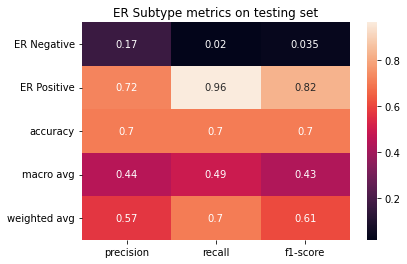

In [ ]:
logreg_er = LogisticRegression()
report, logreg_er = get_classification_report(logreg_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.6637, Validation Accuracy: 0.6467
Training Precision: 0.6380, Validation Precision: 0.6125
Training Recall: 0.6637, Validation Recall: 0.6467
Training F1-Score: 0.5979, Validation F1-Score: 0.5669


c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.761302,0.755435,0.743978,0.719832,0.761302,0.755435,0.685765,0.672945,0.702703,0.567945,0.702703,0.606720,0.570383
0,Logistic Regression,PR,0.663653,0.646739,0.638045,0.612516,0.663653,0.646739,0.597933,0.566915,0.654054,0.614359,0.654054,0.595159,0.581741


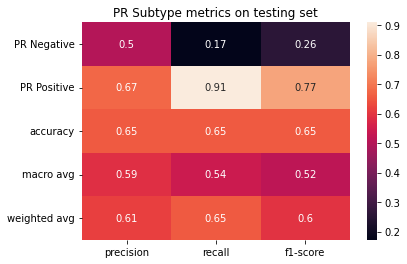

In [ ]:
logreg_pr = LogisticRegression()
report, logreg_pr = get_classification_report(logreg_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

classification_results

Training Accuracy: 0.8174, Validation Accuracy: 0.8207
Training Precision: 0.7613, Validation Precision: 0.6899
Training Recall: 0.8174, Validation Recall: 0.8207
Training F1-Score: 0.7418, Validation F1-Score: 0.7496


c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


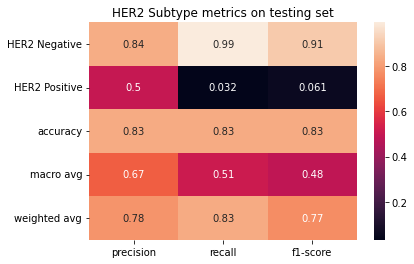

In [ ]:
logreg_her2 = LogisticRegression()
report, logreg_her2 = get_classification_report(logreg_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HIMANSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

Training Accuracy: 0.6582, Validation Accuracy: 0.6576
Training Precision: 0.5486, Validation Precision: 0.5287
Training Recall: 0.6582, Validation Recall: 0.6576
Training F1-Score: 0.5404, Validation F1-Score: 0.5389


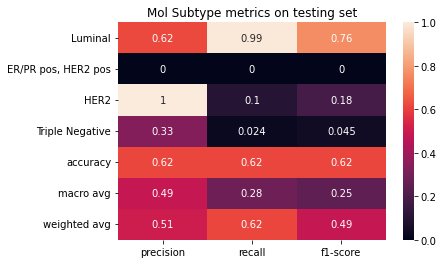

In [ ]:
logreg_mol_subtype = LogisticRegression()
report, logreg_mol_subtype = get_classification_report(logreg_mol_subtype, train_x, train_y_mol_subtype, val_x, val_y_mol_subtype, test_x, test_y_mol_subtype, ['Luminal', 'ER/PR pos, HER2 pos', 'HER2', 'Triple Negative'], 'Mol Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'Mol Subtype'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

## Classification scores

In [ ]:
classification_results.reset_index(drop = True, inplace = True)
classification_results.sort_values(by = ['Subtype', 'Algorithm'])

,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1,test_aucroc
0,Logistic Regression,ER,0.761302,0.755435,0.743978,0.719832,0.761302,0.755435,0.685765,0.672945,0.702703,0.567945,0.702703,0.606720,0.570383
3,Logistic Regression,HER2,0.817360,0.820652,0.761287,0.689889,0.817360,0.820652,0.741847,0.749611,0.832432,0.779752,0.832432,0.766014,0.563259
2,Logistic Regression,Mol Subtype,0.658228,0.657609,0.548616,0.528738,0.658228,0.657609,0.540444,0.538883,0.616216,0.505888,0.616216,0.485281,NaN
1,Logistic Regression,PR,0.663653,0.646739,0.638045,0.612516,0.663653,0.646739,0.597933,0.566915,0.654054,0.614359,0.654054,0.595159,0.581741


In [ ]:
#classification_results.to_csv("Classification results/No FS results for LR.csv", index = False)